# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import numpy as np
import pandas as pd
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [2]:
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
#filtering to just show passengers
data_class_embark = df_titanic[(df_titanic["class"] == "1st") | (df_titanic["class"] == "2nd") | (df_titanic["class"] == "3rd")]

In [4]:
#joint distribution or cross tab between a passengers class and where they embarked
pd.crosstab(data_class_embark["embarked"], data_class_embark["class"])

class,1st,2nd,3rd
embarked,,,
B,3,6,0
C,143,26,102
Q,3,7,113
S,175,245,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?


---



The conditional distribution of their class given where they embarked

In [5]:
#Calculating it "by hand"
dist_class_embark_unique = data_class_embark.groupby("embarked")["class"].value_counts()
dist_class_embark_pop = data_class_embark.groupby("embarked")["class"].count()

a = (dist_class_embark_unique / dist_class_embark_pop)
a

embarked  class
B         2nd      0.666667
          1st      0.333333
C         1st      0.527675
          3rd      0.376384
          2nd      0.095941
Q         3rd      0.918699
          2nd      0.056911
          1st      0.024390
S         3rd      0.540481
          2nd      0.268053
          1st      0.191466
Name: class, dtype: float64

In [6]:
#Tidying it up
# Turning the muli-level index into a dataframe and attatching name to the third column to make it work
df = a.reset_index(name = "probability")

# Getting the df into the right format
a = df.pivot(index='embarked', columns='class', values='probability')
a

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,NaN
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


The conditional distribution of where they embarked given their class

In [7]:
dist_class_embark_unique = data_class_embark.groupby("class")["embarked"].value_counts()
dist_class_embark_pop = data_class_embark.groupby("class")["embarked"].count()

b = (dist_class_embark_unique / dist_class_embark_pop)
b

class  embarked
1st    S           0.540123
       C           0.441358
       B           0.009259
       Q           0.009259
2nd    S           0.862676
       C           0.091549
       Q           0.024648
       B           0.021127
3rd    S           0.696756
       Q           0.159379
       C           0.143865
Name: embarked, dtype: float64

In [8]:
#Tidying it up
# Turning the muli-level index into a dataframe and attatching name to the third column to make it work
df = b.reset_index(name = "probability")

# Getting the df into the right format
b = df.pivot(index='embarked', columns='class', values='probability')
b

class,1st,2nd,3rd
embarked,,,
B,0.009259,0.021127,NaN
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756




---



What proportion of Southampton passengers were in 3rd class?

In [9]:
# "by hand"
len(data_class_embark[(data_class_embark["class"] == "3rd") & (data_class_embark["embarked"] == "S")])/len(data_class_embark[(data_class_embark["embarked"] == "S")])

0.5404814004376368

Proportion of Southampton passengers were in 3rd class?

In [10]:
# "by hand"
len(data_class_embark[(data_class_embark["class"] == "3rd") & (data_class_embark["embarked"] == "S")])/len(data_class_embark[(data_class_embark["class"] == "3rd")])

0.6967559943582511

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

<Axes: title={'center': 'conditional distribution of class given where they embarked'}, xlabel='Class', ylabel='Where they Embarked'>

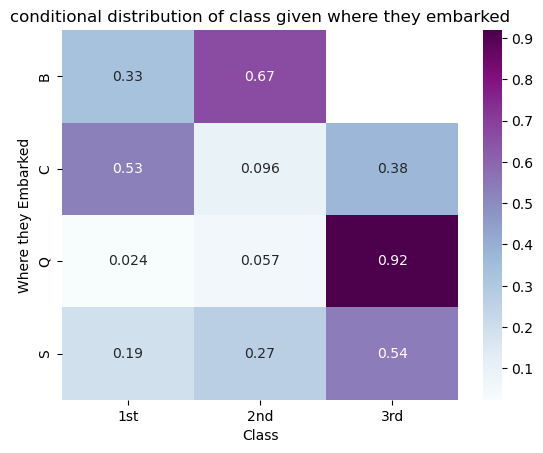

In [11]:
import seaborn as sns

#heatmap for conditional distribution table
p = sns.heatmap(a, annot=True, cmap="BuPu")
p.set(xlabel='Class', ylabel='Where they Embarked', title='conditional distribution of class given where they embarked')

p